In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read in csv 
df = pd.read_csv("../Resources/race_data.csv")

In [3]:
# view dataset of mmr stratified by race 
df.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298


### Viewing Distribution of Data with Histograms by Race

In [4]:
# create dataframes for mmr data for each race in our dataset

# african american, not hispanic or latino
af_amer_mmr = df.loc[(df["race"] == "Black or African American") & (df["hispanic_origin"] == "Not Hispanic or Latino")]

# white, not hispanic or latino
wh_mmr = df.loc[(df["race"] == "White") & (df["hispanic_origin"] == "Not Hispanic or Latino")]

# white, hispanic or latino
wh_hisp_mmr = df.loc[(df["race"] == "White") & (df["hispanic_origin"] == "Hispanic or Latino")]

# asian, not hispanic or latino
asian_mmr = df.loc[(df["race"] == "Asian or Pacific Islander") & (df["hispanic_origin"] == "Not Hispanic or Latino")]

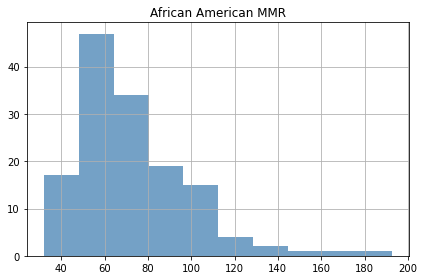

In [5]:
af_amer_hist = af_amer_mmr[["mmr_by_race"]].hist(histtype="stepfilled", color="#4682B4", alpha=.75)
af_amer_hist

plt.title("African American MMR")
plt.yticks([0, 10, 20, 30, 40])
plt.tight_layout()

# save plot
plt.savefig("../../static/img/af_amer_mmr_histogram.png")

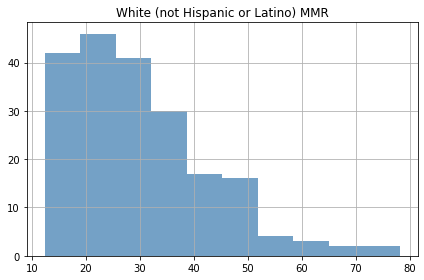

In [6]:
wh_mmr_hist = wh_mmr[["mmr_by_race"]].hist(histtype="stepfilled", color="#4682B4", alpha=0.75)
wh_mmr_hist

plt.title("White (not Hispanic or Latino) MMR")
plt.yticks([0, 10, 20, 30, 40])
plt.tight_layout()

# save plot
plt.savefig("../../static/img/wh_mmr_histogram.png")

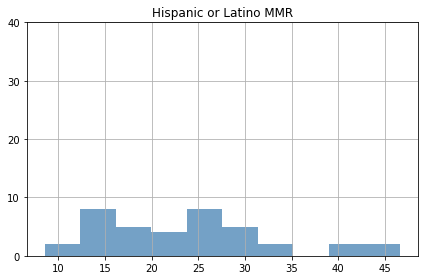

In [7]:
hisp_mmr_hist = wh_hisp_mmr[["mmr_by_race"]].hist(histtype="stepfilled", color="#4682B4", alpha=0.75)

plt.title("Hispanic or Latino MMR")
plt.yticks([0, 10, 20, 30, 40])
plt.tight_layout()

# save plot
plt.savefig("../../static/img/his_lat_mmr_histogram.png")

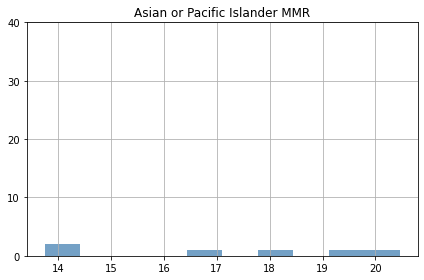

In [8]:
asian_mmr_hist = asian_mmr[["mmr_by_race"]].hist(histtype="stepfilled", color="#4682B4", alpha=0.75)

plt.title("Asian or Pacific Islander MMR")
plt.yticks([0, 10, 20, 30, 40])
plt.tight_layout()

# save plot
plt.savefig("../../static/img/asian_mmr_histogram.png")

### Create a Heatmap for Viewing Correlations in Dataset

In [9]:
# binary encoding with preserving all columns for heatmap
df_binary_encoded = pd.get_dummies(df, columns=["race", "hispanic_origin"])
df_binary_encoded

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903,0,0,1,0,1
384,Wisconsin,55,2009,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
385,Wisconsin,55,2011,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
386,Wisconsin,55,2014,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868,0,0,1,0,1


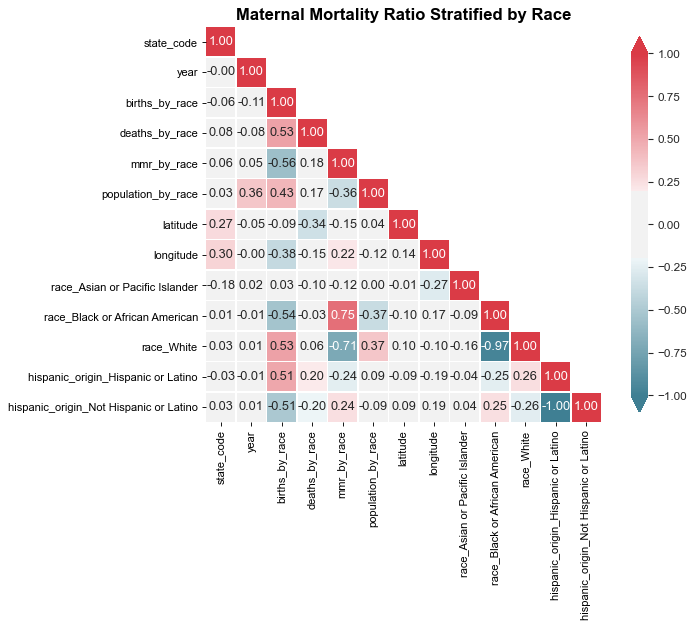

In [10]:
# entire df with binary_encoded data for heatmap
fig, ax = plt.subplots(figsize=(10, 8), dpi=80, facecolor="w", edgecolor="k")

# finding correlation for each feature in dataset 
corr = df_binary_encoded.corr()

# styling guided by https://www.kaggle.com/teampark/mortality-rate-exploration-and-visualization
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# include diagonal elements also
mask[np.diag_indices_from(mask)] = False
sns.set(context="paper", style="ticks", font_scale=1.2)

# adjust title and fontsize 
ax.set(title="Maternal Mortality Ratio Stratified by Race")
plt.title("Maternal Mortality Ratio Stratified by Race", fontsize=15, fontweight="bold")

# plotting the heatmap
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
            square=True, linewidths=.5, annot=True, ax=ax, fmt=".2f", 
            cbar_kws={"shrink": .95, "extend": "both"})

plt.tight_layout()

# saving the heatmap
plt.savefig("../../static/img/heatmap_mmr_strat_by_race.png")

### Linear Regression Model 

#### setting x and y values

In [11]:
# setting our X and y values for mmr for all races 
X = df_binary_encoded[["race_Asian or Pacific Islander", "race_Black or African American",
                       "race_White", "hispanic_origin_Hispanic or Latino",
                       "hispanic_origin_Not Hispanic or Latino", 
                       "population_by_race"]]

# adjusting features after RFE, these did not improve score 
# X = df_binary_encoded[["race_Asian or Pacific Islander", "race_Black or African American",
#                        "race_White"]]
y = df_binary_encoded["mmr_by_race"].values.reshape(-1, 1)
print(X.shape, y.shape)

(388, 6) (388, 1)


#### Train, Test Split

In [12]:
# use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino,population_by_race
145,0,0,1,0,1,0
7,0,0,1,0,1,1660160
19,0,0,1,0,1,1125656
262,0,1,0,0,1,1221722
367,0,0,1,0,1,1197984


In [13]:
y_train.max()
# y_train.min()

192.68

#### Fitting the model with non-scaled data 

In [14]:
# running model without scaling data
from sklearn.linear_model import LinearRegression
model_no_scale = LinearRegression(n_jobs=500)
model_no_scale.fit(X_train, y_train)

LinearRegression(n_jobs=500)

In [15]:
# find the r2
r_sq_no_scale = model_no_scale.score(X_train, y_train)
r_sq_no_scale
print ("Coefficient of determination (R2):", r_sq_no_scale)
# 0.587634628814633

Coefficient of determination (R2): 0.587634628814633


#### Scoring the model on testing and training data

In [16]:
# make predictions and display r2 for testing and training data without scaling
from sklearn.metrics import mean_squared_error

predictions1 = model_no_scale.predict(X_test)
MSE1 = mean_squared_error(y_test, predictions1)

r2_testing1 = model_no_scale.score(X_test, y_test)
r2_training1 = model_no_scale.score(X_train, y_train)

print(f"MSE: {MSE1}") 
print(f"R2 Testing: {r2_testing1}") 
print(f"R2 Training: {r2_training1}")

MSE: 364.27539582893286
R2 Testing: 0.5550222997732394
R2 Training: 0.587634628814633


#### Saving the highest-scoring model 

In [17]:
# Saving the model with `joblib`
import joblib 

filename = '../models/Linear_Regression_strat_by_race_model_no_scale_Lee.sav'
# commenting out the line below after saving the model to avoid accidental changes
# joblib.dump(model_no_scale, filename)

['../models/Linear_Regression_strat_by_race_model_no_scale_Lee.sav']

#### Plotting the non-scaled training and testing data

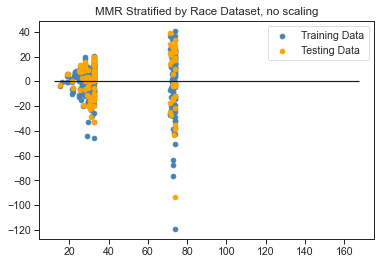

In [17]:
# plot data without scaling 
plt.figure(figsize=(6,4))
plt.scatter(model_no_scale.predict(X_train), model_no_scale.predict(X_train) - y_train, c="steelblue", label="Training Data")
plt.scatter(model_no_scale.predict(X_test), model_no_scale.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("MMR Stratified by Race Dataset, no scaling")
plt.show()

#### Scaling the data with standard scaler 

In [18]:
# choosing standard scaler because we know our data has outliers
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [19]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#### Fitting Linear Regression model with scaled data

In [20]:
# running our model on scaled data 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [21]:
# find the r2 for scaled training data
r_sq = model.score(X_train_scaled, y_train_scaled)
r_sq
print ("Coefficient of determination (R2):", r_sq)
# 0.5861630736566594

Coefficient of determination (R2): 0.5861630736566594


#### Plotting the scaled training and testing data

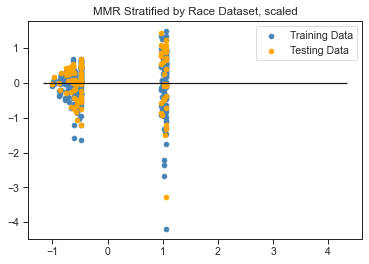

In [22]:
# Plot the results 
plt.figure(figsize=(6,4))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="steelblue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("MMR Stratified by Race Dataset, scaled")
plt.show()

#### RFE to Identify Insignificant Variables

In [23]:
# RFE before predictions to Identify Insignificant Variables 
from sklearn.feature_selection import RFE
# Create the RFE model
rfe = RFE(model)
# Fit model
rfe = rfe.fit(X_train_scaled, y_train_scaled)
# summarize the selection of the attributes
rfe_df = pd.DataFrame({
    'features': X.columns,
    'support': rfe.support_,
    'ranking': rfe.ranking_
})
rfe_df
# experimented with dropping the features that were false for support for the y
# the results did not improve our r2 value 

,features,support,ranking
0,race_Asian or Pacific Islander,True,1
1,race_Black or African American,True,1
2,race_White,True,1
3,hispanic_origin_Hispanic or Latino,False,3
4,hispanic_origin_Not Hispanic or Latino,False,2
5,population_by_race,False,4


#### Scoring the model on testing and training data

In [24]:
# make predictions and display r2 for scaled testing and training data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)

r2_testing = model.score(X_test_scaled, y_test_scaled)
r2_training = model.score(X_train_scaled, y_train_scaled)

print(f"MSE: {MSE}") 
print(f"R2 Testing: {r2_testing}") 
print(f"R2 Training: {r2_training}")

MSE: 0.4618133463506332
R2 Testing: 0.5542755745676244
R2 Training: 0.5861630736566594


### Time-Series Forecast of Average Annual Maternal Mortality in the U.S. using highest scoring model

#### Plotting MMR for White, not Hispanic or Latino

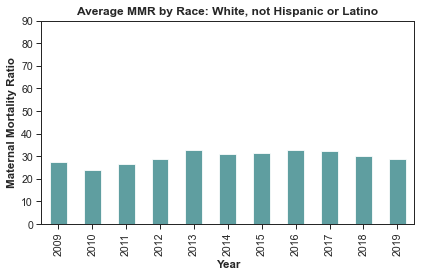

In [52]:
# plotting mmr_by_race by year
y = "mmr_by_race"

# .loc for finding specific race
wh_enc_df = df_binary_encoded.loc[(df_binary_encoded["race_White"] == 1) & (df_binary_encoded["hispanic_origin_Not Hispanic or Latino"] == 1)]
wh_enc_df

# group by year
avg_wh_df = wh_enc_df.groupby("year").mean()[y]
avg_wh_df

# plotting barplot of mmr by year, by white race
avg_wh_df.plot(kind="bar", yticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], color="#5F9EA0", figsize=(6,4))
plt.title("Average MMR by Race: White, not Hispanic or Latino", fontsize=12, fontweight="bold")
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Maternal Mortality Ratio", fontweight="bold")

plt.tight_layout()

# save the plot
plt.savefig("../../static/img/avg_mmr_white.png")

In [43]:
# make a dataframe for White, not Hispanic or Latino, mmr
white_mmr = avg_wh_df.reset_index().rename(columns={"mmr_by_race":"MMR_White"})
white_mmr

,year,MMR_White
0,2009,27.388571
1,2010,24.042727
2,2011,26.372353
3,2012,28.588000
4,2013,32.740500
5,2014,30.829000
6,2015,31.277500
7,2016,32.752083
8,2017,32.214348
9,2018,29.984762


In [44]:
# testing adding population by race, but missing values make the calculation off

# add population by race and calculate average
y = "population_by_race"

# group by year
avg_wh_pop = wh_enc_df.groupby("year").mean()[y]
avg_wh_pop

year
2009    1.735035e+06
2010    1.142532e+06
2011    6.956229e+05
2012    6.621451e+05
2013    1.314986e+06
2014    1.947600e+06
2015    1.492152e+06
2016    2.534287e+06
2017    3.396045e+06
2018    3.380456e+06
2019    3.675700e+06
Name: population_by_race, dtype: float64

#### Plotting MMR for Black or African American, not Hispanic or Latino

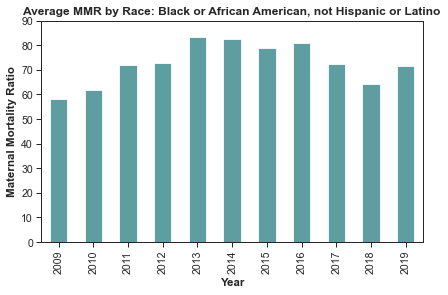

In [28]:
# plotting mmr_by_race by year
y = "mmr_by_race"

# .loc for finding specific race
af_amer_enc_df = df_binary_encoded.loc[(df_binary_encoded["race_Black or African American"] == 1) & (df_binary_encoded["hispanic_origin_Not Hispanic or Latino"] == 1)]
af_amer_enc_df

# group by year
avg_af_amer_df = af_amer_enc_df.groupby("year").mean()[y]
avg_af_amer_df

# plotting barplot of mmr by year, by black or african american race
avg_af_amer_df.plot(kind="bar", yticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], color="#5F9EA0", figsize=(6.5,4.25))
plt.title("Average MMR by Race: Black or African American, not Hispanic or Latino", fontsize=12, fontweight="bold")
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Maternal Mortality Ratio", fontweight="bold")

plt.tight_layout()

# save plot
plt.savefig("../../static/img/avg_mmr_af_amer.png")

In [46]:
# make a dataframe for Black or African American, not Hispanic or Latino, mmr
black_mmr = avg_af_amer_df.reset_index().rename(columns={"mmr_by_race":"MMR_Black_or_African_American"})
black_mmr

,year,MMR_Black_or_African_American
0,2009,58.173846
1,2010,61.764444
2,2011,72.118000
3,2012,72.866154
4,2013,83.244545
5,2014,82.588462
6,2015,78.995833
7,2016,81.009333
8,2017,72.500000
9,2018,64.248333


#### merging white and black mmr dataframes

In [47]:
# merge our first two by_race dataframes
merged_1 = pd.merge(white_mmr, black_mmr, how="inner", left_on=["year"], right_on=["year"])
merged_1

,year,MMR_White,MMR_Black_or_African_American
0,2009,27.388571,58.173846
1,2010,24.042727,61.764444
2,2011,26.372353,72.118000
3,2012,28.588000,72.866154
4,2013,32.740500,83.244545
5,2014,30.829000,82.588462
6,2015,31.277500,78.995833
7,2016,32.752083,81.009333
8,2017,32.214348,72.500000
9,2018,29.984762,64.248333


#### Plotting MMR for Asian or Pacific Islander

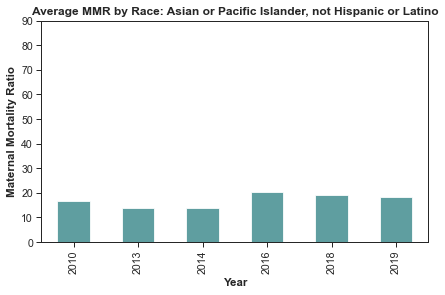

In [26]:
# plotting mmr_by_race by year
y = "mmr_by_race"

# .loc for finding specific race
asian_enc_df = df_binary_encoded.loc[(df_binary_encoded["race_Asian or Pacific Islander"] == 1) & (df_binary_encoded["hispanic_origin_Not Hispanic or Latino"] == 1)]
asian_enc_df

# group by year
avg_asian_df = asian_enc_df.groupby("year").mean()[y]
avg_asian_df

# plotting barplot of mmr by year, by asian race
avg_asian_df.plot(kind="bar", yticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], color="#5F9EA0", figsize=(6.5,4.25))
plt.title("Average MMR by Race: Asian or Pacific Islander, not Hispanic or Latino", fontsize=12, fontweight="bold")

plt.xlabel("Year", fontweight="bold")
plt.ylabel("Maternal Mortality Ratio", fontweight="bold")

plt.tight_layout()

# save plot
plt.savefig("../../static/img/avg_mmr_asian.png")

In [55]:
# make a dataframe for Asian, not Hispanic or Latino, mmr
asian_mmr = avg_asian_df.reset_index().rename(columns={"mmr_by_race":"MMR_Asian_or_Pacific_Islander"})
asian_mmr

,year,MMR_Asian_or_Pacific_Islander
0,2010,16.82
1,2013,13.75
2,2014,13.83
3,2016,20.46
4,2018,19.24
5,2019,18.12


#### merging combined white and black df with asian df

In [56]:
# merge with our by_race dataframes
merged_2 = pd.merge(merged_1, asian_mmr, how="outer", left_on=["year"], right_on=["year"])
merged_2

# replace NaN with O for our missing values for mmr_by_race for Asian
merged_2.fillna(0)

,year,MMR_White,MMR_Black_or_African_American,MMR_Asian_or_Pacific_Islander
0,2009,27.388571,58.173846,0.00
1,2010,24.042727,61.764444,16.82
2,2011,26.372353,72.118000,0.00
3,2012,28.588000,72.866154,0.00
4,2013,32.740500,83.244545,13.75
5,2014,30.829000,82.588462,13.83
6,2015,31.277500,78.995833,0.00
7,2016,32.752083,81.009333,20.46
8,2017,32.214348,72.500000,0.00
9,2018,29.984762,64.248333,19.24


#### Plotting MMR for Hispanic or Latino

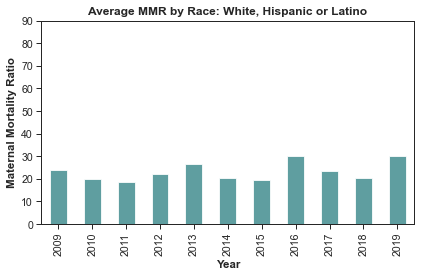

In [57]:
# plotting mmr_by_race by year
y = "mmr_by_race"

# .loc for finding specific race
his_enc_df = df_binary_encoded.loc[(df_binary_encoded["hispanic_origin_Hispanic or Latino"] == 1)]
his_enc_df

# group by year
avg_his_df = his_enc_df.groupby("year").mean()[y]
avg_his_df

# plotting barplot of mmr by year, by white race
avg_his_df.plot(kind="bar", yticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], color="#5F9EA0", figsize=(6,4))
plt.title("Average MMR by Race: White, Hispanic or Latino", fontsize=12, fontweight="bold")

plt.xlabel("Year", fontweight="bold")
plt.ylabel("Maternal Mortality Ratio", fontweight="bold")

plt.tight_layout()

# save plot
plt.savefig("../../static/img/avg_mmr_hispanic.png")

In [58]:
# make a dataframe for Hispanic or Latino
his_mmr = avg_his_df.reset_index().rename(columns={"mmr_by_race":"MMR_Hispanic_or_Latino"})
his_mmr

,year,MMR_Hispanic_or_Latino
0,2009,24.107500
1,2010,20.000000
2,2011,18.496667
3,2012,22.103333
4,2013,26.713333
5,2014,20.375000
6,2015,19.556667
7,2016,29.912500
8,2017,23.612500
9,2018,20.577500


#### merging combined white, black, asian df with hispanic df

In [37]:
# merge with our by_race dataframes
merged_3 = pd.merge(merged_2, his_mmr, how="inner", left_on=["year"], right_on=["year"])

merged_3

,year,MMR_White,MMR_Black_or_African_American,MMR_Asian_or_Pacific_Islander,MMR_Hispanic_or_Latino
0,2009,27.388571,58.173846,NaN,24.107500
1,2010,24.042727,61.764444,16.82,20.000000
2,2011,26.372353,72.118000,NaN,18.496667
3,2012,28.588000,72.866154,NaN,22.103333
4,2013,32.740500,83.244545,13.75,26.713333
5,2014,30.829000,82.588462,13.83,20.375000
6,2015,31.277500,78.995833,NaN,19.556667
7,2016,32.752083,81.009333,20.46,29.912500
8,2017,32.214348,72.500000,NaN,23.612500
9,2018,29.984762,64.248333,19.24,20.577500


### Saving DataFrame with Average MMR for Each Race to CSV

In [38]:
# saving merged df to csv, without the index, but with the header
merged_3.to_csv("../Resources/stratified_by_race_avg_mmr_2009_2019.csv", index=False, header=True, float_format='%.2f')

In [39]:
# rename and reorder columns for highest to lowest mmr for displaying legend in line plot
rename_mmr = merged_3.rename(columns={"MMR_White": "White",
                        "MMR_Black_or_African_American": "Black or African American",
                        "MMR_Asian_or_Pacific_Islander": "Asian or Pacific Islander", 
                        "MMR_Hispanic_or_Latino": "Hispanic or Latino"})

all_race_mmr = rename_mmr[["year", "Black or African American", "White", "Hispanic or Latino", "Asian or Pacific Islander"]]
all_race_mmr

,year,Black or African American,White,Hispanic or Latino,Asian or Pacific Islander
0,2009,58.173846,27.388571,24.107500,NaN
1,2010,61.764444,24.042727,20.000000,16.82
2,2011,72.118000,26.372353,18.496667,NaN
3,2012,72.866154,28.588000,22.103333,NaN
4,2013,83.244545,32.740500,26.713333,13.75
5,2014,82.588462,30.829000,20.375000,13.83
6,2015,78.995833,31.277500,19.556667,NaN
7,2016,81.009333,32.752083,29.912500,20.46
8,2017,72.500000,32.214348,23.612500,NaN
9,2018,64.248333,29.984762,20.577500,19.24


### Plotting MMR for each race (2009-2019)

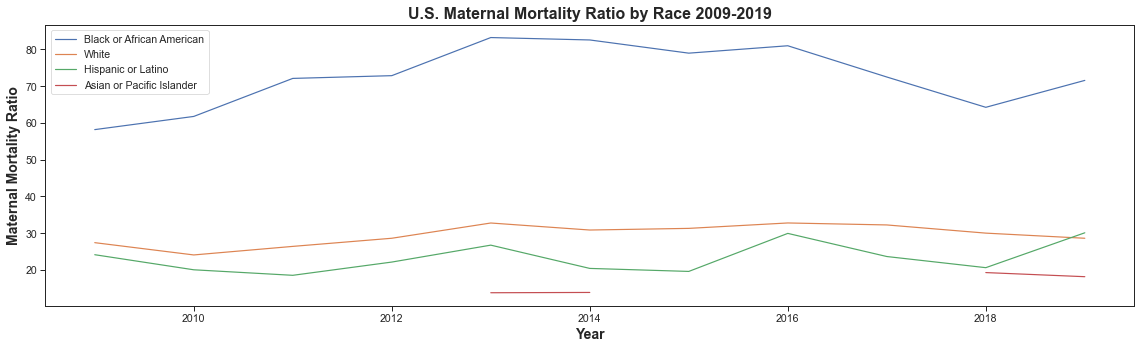

In [40]:
# reset index to "year"
all_avg = all_race_mmr.set_index("year")

# plot graph and choose figure size 
all_avg.plot(kind="line", figsize=(16,5))
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Maternal Mortality Ratio", fontsize=14, fontweight="bold")
plt.title("U.S. Maternal Mortality Ratio by Race 2009-2019", fontsize=16, fontweight="bold")
plt.tight_layout()

# saving plot
plt.savefig("../../static/img/MMR_line_graph_by_race.png")

In [49]:
from sklearn.linear_model import LinearRegression

# selecting and assigning the X and y values
X_w = white_mmr.reset_index().year.values.reshape(-1,1)
y_w = white_mmr.reset_index()["MMR_White"].values

# create model, fit to data
reg_model = LinearRegression().fit(X_w, y_w)

# find r2
r2 = reg_model.score(X_w, y_w)
print(f"R2:{r2}")

# predictions list to hold variables
predictions=[]

# for-loop to add predictions to list
for i in range(2020,2031): 
    y_values=reg_model.predict(np.array([i]).reshape(1, -1))
    predictions.append(y_values[0])
    
# list of years range
years = [i for i in range(2020, 2031)]

# new dataframe for mmr values with 10 year predictions
wh_mmr_predict_df = pd.DataFrame(list(zip(years, predictions)),
                                columns=["year", "MMR_White"])
wh_mmr_predict_df
    

R2:0.33616417659015674


,year,MMR_White
0,2020,32.478559
1,2021,32.970804
2,2022,33.463050
3,2023,33.955295
4,2024,34.447540
5,2025,34.939786
6,2026,35.432031
7,2027,35.924276
8,2028,36.416522
9,2029,36.908767


In [1]:
# adding black or african american data
from sklearn.linear_model import LinearRegression

# selecting and assigning the X and y values
X_af = black_mmr.reset_index().year.values.reshape(-1,1)
y_af = black_mmr.reset_index()["MMR_Black_or_African_American"].values

# create model, fit to data
reg_model_2 = LinearRegression().fit(X_af, y_af)

# find r2
r2_2 = reg_model_2.score(X_af, y_af)
# print(f"R2:{r2_2}")

# predictions list to hold variables
b_mmr_pred=[]

# for-loop to add predictions to list
for i in range(2020,2031): 
    y_values=reg_model_2.predict(np.array([i]).reshape(1, -1))
    b_mmr_pred.append(y_values[0])
    
# list of years range
years = [i for i in range(2020, 2031)]

# new dataframe for mmr values with 10 year predictions
bl_mmr_predict_df = pd.DataFrame(list(zip(years, b_mmr_pred)),
                                columns=["year", "MMR_Black_or_African_American"])
bl_mmr_predict_df

# merge first two predictions
combined_1 = pd.merge(wh_mmr_predict_df, bl_mmr_predict_df, how="inner", left_on=["year"], right_on=["year"])
combined_1

NameError: name 'black_mmr' is not defined

In [84]:
# adding asian mmr data
from sklearn.linear_model import LinearRegression

# selecting and assigning the X and y values
X_as = asian_mmr.reset_index().year.values.reshape(-1,1)
y_as = asian_mmr.reset_index()["MMR_Asian_or_Pacific_Islander"].values

# create model, fit to data
reg_model_3 = LinearRegression().fit(X_as, y_as)

# find r2
r2_3 = reg_model_3.score(X_as, y_as)
print(f"R2:{r2_3}")

# predictions list to hold variables
a_mmr_pred=[]

# for-loop to add predictions to list
for i in range(2020,2031): 
    y_values=reg_model_3.predict(np.array([i]).reshape(1, -1))
    a_mmr_pred.append(y_values[0])
    
# list of years range
years = [i for i in range(2020, 2031)]

# new dataframe for mmr values with 10 year predictions
as_mmr_predict_df = pd.DataFrame(list(zip(years, a_mmr_pred)),
                                columns=["year", "MMR_Asian_or_Pacific_Islander"])
as_mmr_predict_df

# merge first two predictions
combined_2 = pd.merge(combined_1, as_mmr_predict_df, how="inner", left_on=["year"], right_on=["year"])
combined_2

R2:0.2923665376145367


,year,MMR_White,MMR_Black_or_African_American,MMR_Asian_or_Pacific_Islander
0,2020,32.478559,77.560652,19.289345
1,2021,32.970804,78.380063,19.739881
2,2022,33.463050,79.199475,20.190417
3,2023,33.955295,80.018886,20.640952
4,2024,34.447540,80.838298,21.091488
5,2025,34.939786,81.657709,21.542024
6,2026,35.432031,82.477121,21.992560
7,2027,35.924276,83.296532,22.443095
8,2028,36.416522,84.115944,22.893631
9,2029,36.908767,84.935355,23.344167


In [85]:
# adding hispanic or latino mmr data
from sklearn.linear_model import LinearRegression

# selecting and assigning the X and y values
X_his = his_mmr.reset_index().year.values.reshape(-1,1)
y_his = his_mmr.reset_index()["MMR_Hispanic_or_Latino"].values

# create model, fit to data
reg_model_4 = LinearRegression().fit(X_his, y_his)

# find r2
r2_4 = reg_model_4.score(X_his, y_his)
print(f"R2:{r2_4}")

# predictions list to hold variables
h_mmr_pred=[]

# for-loop to add predictions to list
for i in range(2020,2031): 
    y_values=reg_model_4.predict(np.array([i]).reshape(1, -1))
    h_mmr_pred.append(y_values[0])
    
# list of years range
years = [i for i in range(2020, 2031)]

# new dataframe for mmr values with 10 year predictions
his_mmr_predict_df = pd.DataFrame(list(zip(years, h_mmr_pred)),
                                columns=["year", "MMR_Hispanic_or_Latino"])
his_mmr_predict_df

# merge first two predictions
combined_3 = pd.merge(combined_2, his_mmr_predict_df, how="inner", left_on=["year"], right_on=["year"])
combined_3

R2:0.1701124422469098


,year,MMR_White,MMR_Black_or_African_American,MMR_Asian_or_Pacific_Islander,MMR_Hispanic_or_Latino
0,2020,32.478559,77.560652,19.289345,26.282545
1,2021,32.970804,78.380063,19.739881,26.791288
2,2022,33.463050,79.199475,20.190417,27.300030
3,2023,33.955295,80.018886,20.640952,27.808773
4,2024,34.447540,80.838298,21.091488,28.317515
5,2025,34.939786,81.657709,21.542024,28.826258
6,2026,35.432031,82.477121,21.992560,29.335000
7,2027,35.924276,83.296532,22.443095,29.843742
8,2028,36.416522,84.115944,22.893631,30.352485
9,2029,36.908767,84.935355,23.344167,30.861227


#### Save predictions dataframe to CSV

In [86]:
# saving the merged predictions df into a csv
combined_3.to_csv("../Resources/stratified_by_race_avg_mmr_2020_2030.csv", index=False, header=True, float_format='%.2f')

### Combine actual and predicted mmr average annual by race 

In [88]:
strat_by_race_2009_2030 = pd.concat([merged_3, combined_3], ignore_index=True)
strat_by_race_2009_2030

,year,MMR_White,MMR_Black_or_African_American,MMR_Asian_or_Pacific_Islander,MMR_Hispanic_or_Latino
0,2009,27.388571,58.173846,NaN,24.107500
1,2010,24.042727,61.764444,16.820000,20.000000
2,2011,26.372353,72.118000,NaN,18.496667
3,2012,28.588000,72.866154,NaN,22.103333
4,2013,32.740500,83.244545,13.750000,26.713333
5,2014,30.829000,82.588462,13.830000,20.375000
6,2015,31.277500,78.995833,NaN,19.556667
7,2016,32.752083,81.009333,20.460000,29.912500
8,2017,32.214348,72.500000,NaN,23.612500
9,2018,29.984762,64.248333,19.240000,20.577500


In [90]:
# check datatypes and columns
strat_by_race_2009_2030.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           22 non-null     int64  
 1   MMR_White                      22 non-null     float64
 2   MMR_Black_or_African_American  22 non-null     float64
 3   MMR_Asian_or_Pacific_Islander  17 non-null     float64
 4   MMR_Hispanic_or_Latino         22 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1008.0 bytes


### Plotting MMR with predictions for each race (2009-2030)

In [96]:
# rename and reorder columns for highest to lowest mmr for displaying legend in line plot
rename_predict_mmr = strat_by_race_2009_2030.rename(columns={"MMR_White": "White",
                        "MMR_Black_or_African_American": "Black or African American",
                        "MMR_Asian_or_Pacific_Islander": "Asian or Pacific Islander", 
                        "MMR_Hispanic_or_Latino": "Hispanic or Latino"})

all_race_predict_mmr = rename_predict_mmr[["year", "Black or African American", "White", "Hispanic or Latino", "Asian or Pacific Islander"]]
all_race_predict_mmr.head()

,year,Black or African American,White,Hispanic or Latino,Asian or Pacific Islander
0,2009,58.173846,27.388571,24.107500,NaN
1,2010,61.764444,24.042727,20.000000,16.82
2,2011,72.118000,26.372353,18.496667,NaN
3,2012,72.866154,28.588000,22.103333,NaN
4,2013,83.244545,32.740500,26.713333,13.75


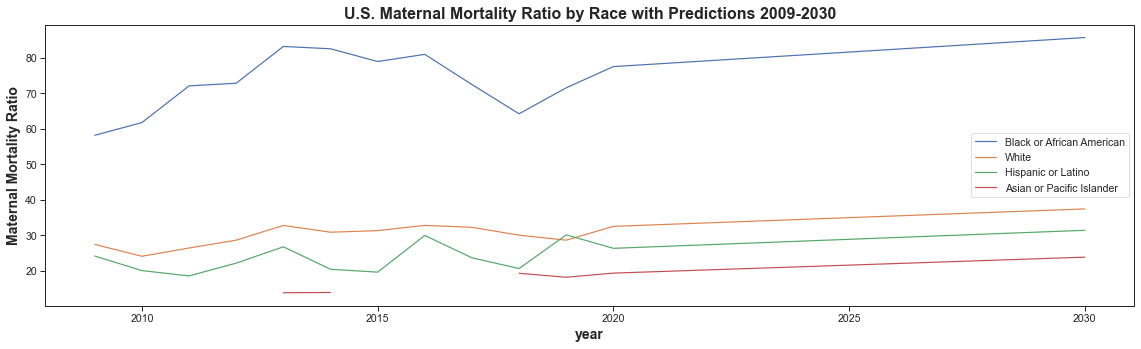

In [98]:
# reset index to "year"
all_avg_predictions = all_race_predict_mmr.set_index("year")

# plot graph and choose figure size 
all_avg_predictions.plot(kind="line", figsize=(16,5))
plt.xlabel("year", fontsize=14, fontweight="bold")
plt.ylabel("Maternal Mortality Ratio", fontsize=14, fontweight="bold")
plt.title("U.S. Maternal Mortality Ratio by Race with Predictions 2009-2030", fontsize=16, fontweight="bold")
plt.tight_layout()

# saving plot
plt.savefig("../../static/img/MMR_line_graph_predictions_by_race.png")

#### Save Combined MMR Annual Average DataFrame to CSV

In [91]:
strat_by_race_2009_2030.to_csv("../Resources/stratified_by_race_mmr_avg_2009_2030.csv", index=False, header=True, float_format='%.2f')

#### Visualizing mmr by race across 2009-2019

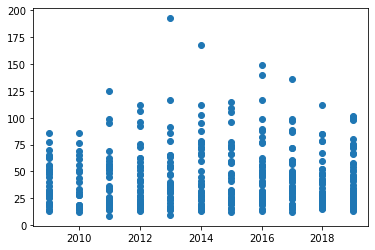

In [118]:
# visualize mmr_by_race across years data was collected
X1 = df_binary_encoded["year"].values.reshape(-1,1)
y1 = df_binary_encoded["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X1, y1)

In [119]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [120]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [121]:
#make predictions and display r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 820.2420577481126, R2: -0.0019601341876613887


In [122]:
# Make predictions for next 11 years
future_mmr =[]
for i in range(2020, 2031):
    r= model1.predict([[i]])
    future_mmr.append(float(r))
      
    
future_mmr

[46.56959433593698,
 46.77622315946206,
 46.98285198298714,
 47.18948080651222,
 47.3961096300373,
 47.60273845356238,
 47.809367277087404,
 48.01599610061248,
 48.22262492413756,
 48.42925374766264,
 48.63588257118772]

In [123]:
# create a dictionary to hold predicted values
predicted_mmr = {
    "year": [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "mmr_by_race": future_mmr
}

# create a dataframe
predicted_mmr_df = pd.DataFrame(predicted_mmr)
predicted_mmr_df

,year,mmr_by_race
0,2020,46.569594
1,2021,46.776223
2,2022,46.982852
3,2023,47.189481
4,2024,47.396110
5,2025,47.602738
6,2026,47.809367
7,2027,48.015996
8,2028,48.222625
9,2029,48.429254


Text(0, 0.5, 'Maternal Mortality Ratio')

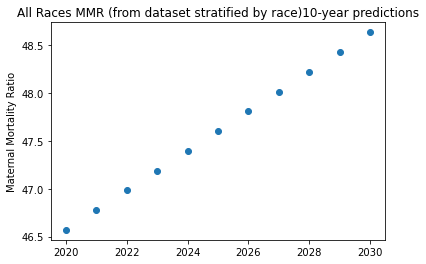

In [124]:
X3 = predicted_mmr_df["year"].values.reshape(-1,1)
y3 = predicted_mmr_df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X3,y3)
plt.title("All Races MMR (from dataset stratified by race)10-year predictions")
plt.ylabel("Maternal Mortality Ratio")

In [125]:
# combine the prediction dataframe with the original dataframe
dataframes = [df, predicted_mmr_df]
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1.0,2016,Black or African American,Not Hispanic or Latino,17989.0,14.0,77.83,0.0,US.AL,AL,32.318231,-86.902298
1,Alabama,1.0,2016,White,Not Hispanic or Latino,35319.0,18.0,50.96,0.0,US.AL,AL,32.318231,-86.902298
2,Alabama,1.0,2017,Black or African American,Not Hispanic or Latino,18354.0,25.0,136.21,704201.0,US.AL,AL,32.318231,-86.902298
3,Alabama,1.0,2017,White,Not Hispanic or Latino,34784.0,15.0,43.12,1655605.0,US.AL,AL,32.318231,-86.902298
4,Alabama,1.0,2018,Black or African American,Not Hispanic or Latino,17939.0,14.0,78.04,706754.0,US.AL,AL,32.318231,-86.902298


#### African American MMR 

In [103]:
# setting our X and y values for mmr for african american exclusively
# adjusting our X values (removing births and population) after running RFE
# adjusting our X values (removing deaths) after running RFE
# removing X values makes our R2 go down, adding X values back to our model
X_af_am = df_binary_encoded[["race_Black or African American", "population_by_race"]]
y_af_am = df_binary_encoded["mmr_by_race"].values.reshape(-1, 1)
print(X_af_am.shape, y_af_am.shape)

(388, 2) (388, 1)


In [104]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_af_am_train, X_af_am_test, y_af_am_train, y_af_am_test = train_test_split(X_af_am, y_af_am, random_state=42)

In [105]:
# running African American model without scaling data
from sklearn.linear_model import LinearRegression
model_af_amer = LinearRegression()
model_af_amer.fit(X_af_am_train, y_af_am_train)

LinearRegression()

In [106]:
# RFE before predictions to Identify Insignificant Variables 
from sklearn.feature_selection import RFE
# Create the RFE model
rfe2 = RFE(model)
# Fit model
rfe2 = rfe2.fit(X_af_am_train, y_af_am_train)
# summarize the selection of the attributes
rfe2_df = pd.DataFrame({
    'features': X_af_am.columns,
    'support': rfe2.support_,
    'ranking': rfe2.ranking_
})
rfe2_df

,features,support,ranking
0,race_Black or African American,True,1
1,population_by_race,False,2


In [107]:
# make predictions and display r2 for African American exclusive testing and training data
from sklearn.metrics import mean_squared_error

predictions3 = model_af_amer.predict(X_af_am_test)
MSE3 = mean_squared_error(y_af_am_test, predictions3)

r2_testing_af_am = model_af_amer.score(X_af_am_test, y_af_am_test)
r2_training_af_am = model_af_amer.score(X_af_am_train, y_af_am_train)

print(f"MSE: {MSE3}") 
print(f"R2 Testing: {r2_testing_af_am}") 
print(f"R2 Training: {r2_training_af_am}")

MSE: 374.6438860190242
R2 Testing: 0.5423567533969553
R2 Training: 0.5826625280067197


In [108]:
af_amer_mmr.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298
6,Alabama,1,2019,Black or African American,Not Hispanic or Latino,18620,15,80.56,709544,US.AL,AL,32.318231,-86.902298
20,California,6,2009,Black or African American,Not Hispanic or Latino,31090,17,54.68,1192173,US.CA,CA,36.778261,-119.417932


In [110]:
# set our x and y
X4 = af_amer_mmr[["year"]]
y4 = af_amer_mmr[["mmr_by_race"]]
print(X4.shape, y4.shape)

(141, 1) (141, 1)


In [111]:
# use test, train, split to create training and testing data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)

(105, 1)
(105, 1)
(36, 1)


In [112]:
# create the linear regression model
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X4_train, y4_train)

LinearRegression()

In [113]:
from sklearn.metrics import mean_squared_error

predictions = model2.predict(X4_test)
MSE = mean_squared_error(y4_test, predictions)
r2 = model2.score(X4_test, y4_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 487.18502790582744, R2: -0.17542467279890794


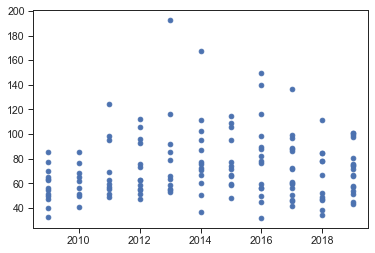

In [114]:

# visualize african american mmr
X4 = af_amer_mmr["year"].values.reshape(-1,1)
y4 = af_amer_mmr["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X4,y4)

In [115]:
# Make predictions for next 11 years
future_af_amer_mmr =[]
for i in range(2020, 2031):
    r= model2.predict([[i]])
    future_af_amer_mmr.append(float(r))
      
    
future_af_amer_mmr

[76.34695944373334,
 76.54468870010476,
 76.74241795647623,
 76.9401472128477,
 77.13787646921918,
 77.33560572559065,
 77.53333498196213,
 77.73106423833354,
 77.92879349470502,
 78.1265227510765,
 78.32425200744797]

In [116]:
# create a dictionary to hold predicted values
predicted_af_amer_mmr = {
    "year": [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "mmr_by_race": future_af_amer_mmr
}

# create a dataframe
predicted_af_amer_mmr_df = pd.DataFrame(predicted_af_amer_mmr)
predicted_af_amer_mmr_df

,year,mmr_by_race
0,2020,76.346959
1,2021,76.544689
2,2022,76.742418
3,2023,76.940147
4,2024,77.137876
5,2025,77.335606
6,2026,77.533335
7,2027,77.731064
8,2028,77.928793
9,2029,78.126523


Text(0, 0.5, 'Maternal Mortality Ratio')

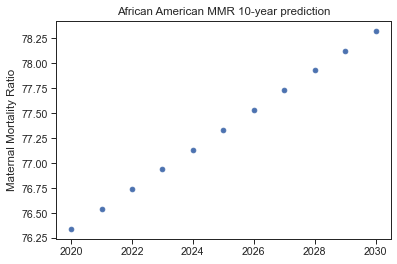

In [117]:
X6 = predicted_af_amer_mmr_df["year"].values.reshape(-1,1)
y6 = predicted_af_amer_mmr_df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X6,y6)
plt.title("African American MMR 10-year prediction")
plt.ylabel("Maternal Mortality Ratio")

### Analysis

 - For our MMR data stratified by race, the MMR wasn't clearly increasing over our selected timeframe of 2009-2019. 
 
 - We used a linear regression model and experimented with feature selection after running RFE to identify insignificant variables. However, removing the insignificant variables did not improve the R2 value for any of the linear regression models. 
 
 
 - Our highest scoring model was Linear Regression with non-scaled data, using each of our race and hispanic origin categories, and birth, death, and population data, stratified by race. These are the resulting scores: 
 
    - MSE: 364.27539582893286
    - R2 Testing: 0.5550222997732394
    - R2 Training: 0.587634628814633
